In [1]:
! pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import string
import spacy
import re

In [3]:
url="https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/"

In [4]:
headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"}
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')


In [5]:
soup=BeautifulSoup(page.content, 'html.parser')

In [6]:
pip install bson

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pymongo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
from pymongo import MongoClient

In [9]:
MONGO_ADDRESS = "mongodb:https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/"
from bson import json_util
from collections import Counter

In [10]:
print("Title of the website is : ")
for title in soup.find_all('title'):
    print(title.get_text())

Title of the website is : 
AI in healthcare to Improve Patient Outcomes - Blackcoffer Insights


In [11]:
article_url ="https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/"

def AI_in_healthcare_to_Improve_Patient_Outcomes(article_url):
    article = Article(article_url)
    article.download()
    article.parse()
    return article.title,article.text


In [12]:
article_url

'https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/'

In [13]:
content=soup.findAll(attrs={'class':'content'})

In [14]:
for content in range(len(content)):
    print(content[name])
    content_text.replace('\n'," ")
    content

In [15]:
content=soup.findAll(attrs={'class':'td-post-content'})
content=content[0].text.replace('\n'," ")
content


' Introduction “If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research. After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detectin

In [16]:
content = content.translate(str.maketrans('', '', string.punctuation)) 
content

' Introduction “If anything kills over 10 million people in the next few decades it will be a highly infectious virus rather than a war Not missiles but microbes” Bill Gates’s remarks at a TED conference in 2014 right after the world had avoided the Ebola outbreak When the new unprecedented invisible virus hit us it met an overwhelmed and unprepared healthcare system and oblivious population This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities For the past few years artificial intelligence has proven to be of tangible potential in the healthcare sectors clinical practices translational medical and biomedical research After the first case was detected in China on December 31st 2019 it was an AI program developed by BlueDot that alerted the world about the pandemic It was quick to realise AI’s ability to analyse large chunks of data could help in detecting patterns and i

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
test_tokens=word_tokenize(content)
test_tokens[0:50]

['Introduction',
 '“',
 'If',
 'anything',
 'kills',
 'over',
 '10',
 'million',
 'people',
 'in',
 'the',
 'next',
 'few',
 'decades',
 'it',
 'will',
 'be',
 'a',
 'highly',
 'infectious',
 'virus',
 'rather',
 'than',
 'a',
 'war',
 'Not',
 'missiles',
 'but',
 'microbes',
 '”',
 'Bill',
 'Gates',
 '’',
 's',
 'remarks',
 'at',
 'a',
 'TED',
 'conference',
 'in',
 '2014',
 'right',
 'after',
 'the',
 'world',
 'had',
 'avoided',
 'the',
 'Ebola',
 'outbreak']

In [19]:
len(test_tokens)

1814

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in test_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])



['Introduction', '“', 'If', 'anything', 'kills', '10', 'million', 'people', 'next', 'decades', 'highly', 'infectious', 'virus', 'rather', 'war', 'Not', 'missiles', 'microbes', '”', 'Bill', 'Gates', '’', 'remarks', 'TED', 'conference', '2014', 'right', 'world', 'avoided', 'Ebola', 'outbreak', 'When', 'new', 'unprecedented', 'invisible', 'virus', 'hit', 'us', 'met', 'overwhelmed']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
len(no_stop_tokens)

1198

# Positive Word

In [23]:
with open("F:\data/positive-words.txt","r",encoding = "ISO-8859-1") as pos:
    poswords = pos.read().split("\n")
    poswords = poswords[5:]

In [24]:
pos_count = " ".join ([w for w in no_stop_tokens if w in poswords])
pos_count=pos_count.split(" ")

In [25]:
Positive_score=len(pos_count)
print(Positive_score)

77


# Negative word

In [26]:
with open("F:\data/negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    
negwords = negwords[36:]

In [27]:
neg_count = " ".join ([w for w in no_stop_tokens if w in negwords])
neg_count=neg_count.split(" ")

In [28]:
Negative_score=len(neg_count)
print(Negative_score)

33


In [29]:

filter_content = ' '.join(no_stop_tokens)


In [30]:

data=[[url,title,content,filter_content,Positive_score,Negative_score]]


In [31]:
data=pd.DataFrame(data,columns=["url","title","content","filter_content","Positive_Score","Negative_Score"])


In [32]:
data

,url,title,content,filter_content,Positive_Score,Negative_Score
0,https://insights.blackcoffer.com/ai-in-healthc...,[AI in healthcare to Improve Patient Outcomes ...,Introduction “If anything kills over 10 milli...,Introduction “ If anything kills 10 million pe...,77,33


# calculate Polarity Score & Subjectivity Score

In [33]:
pip install -U textblob python -m textblob.download_corpora 

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -m


In [34]:
! pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [35]:
from textblob import TextBlob

In [36]:
# Get The Subjectivity
def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity ])

# Adding Subjectivity & Polarity
data[["polarity", "subjectivity"]] = data.apply(sentiment_analysis, axis=1)

data

,url,title,content,filter_content,Positive_Score,Negative_Score,polarity,subjectivity
0,https://insights.blackcoffer.com/ai-in-healthc...,[AI in healthcare to Improve Patient Outcomes ...,Introduction “If anything kills over 10 milli...,Introduction “ If anything kills 10 million pe...,77,33,0.136936,0.463364


In [37]:
#AVG SENTENCE LENGTH
AVG_SENTENCE_LENGTH = len(content.replace(' ',''))/len(re.split(r'[?!.]', content))
print('Word average =', AVG_SENTENCE_LENGTH)

Word average = 10162.0


In [38]:
!pip install textstat

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import textstat

In [40]:
FOG_INDEX=(textstat.gunning_fog(content))
print(FOG_INDEX)


721.92


In [41]:
AVG_NUMBER_OF_WORDS_PER_SENTENCE = [len(l.split()) for l in re.split(r'[?!.]', content) if l.strip()]
AVG_NUMBER_OF_WORDS_PER_SENTENCE=print(sum(AVG_NUMBER_OF_WORDS_PER_SENTENCE)/len(AVG_NUMBER_OF_WORDS_PER_SENTENCE))


1790.0


In [42]:
def syllable_count(word):
    count = 0
    vowels = "AEIOUYaeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)): 
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("es"or "ed"):
                count -= 1
    if count == 0:
        count += 1
    return count



COMPLEX_WORDS=syllable_count(content)
print(COMPLEX_WORDS)

3579


In [43]:
Word_Count=len(content)
print(Word_Count)

11955


In [44]:
pcw=(COMPLEX_WORDS/Word_Count)*100
print(pcw)

29.937264742785448


In [45]:
def ProperNounExtractor(text):
    count = 0
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag == 'PRP': # If the word is a proper noun
                count = count + 1 
        
    return(count)         
                


# Calling the ProperNounExtractor function to extract all the proper nouns from the given text. 
Personal_Pronouns=ProperNounExtractor(content)

In [46]:
Personal_Pronouns

22

In [47]:
Average_Word_Length=len(content.replace(' ',''))/len(content.split())
print(Average_Word_Length)

5.677094972067039


In [48]:
word=content.replace(' ','')
syllable_count=0
for w in word:
      if(w=='a' or w=='e' or w=='i' or w=='o' or w=='y' or w=='u' or w=='A' or w=='E' or w=='I' or w=='O' or w=='U' or w=='Y'):
            syllable_count=syllable_count+1
print("The AVG number of syllables in the word is: ")
print(syllable_count/len(content.split()))

The AVG number of syllables in the word is: 
2.2480446927374302


In [49]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

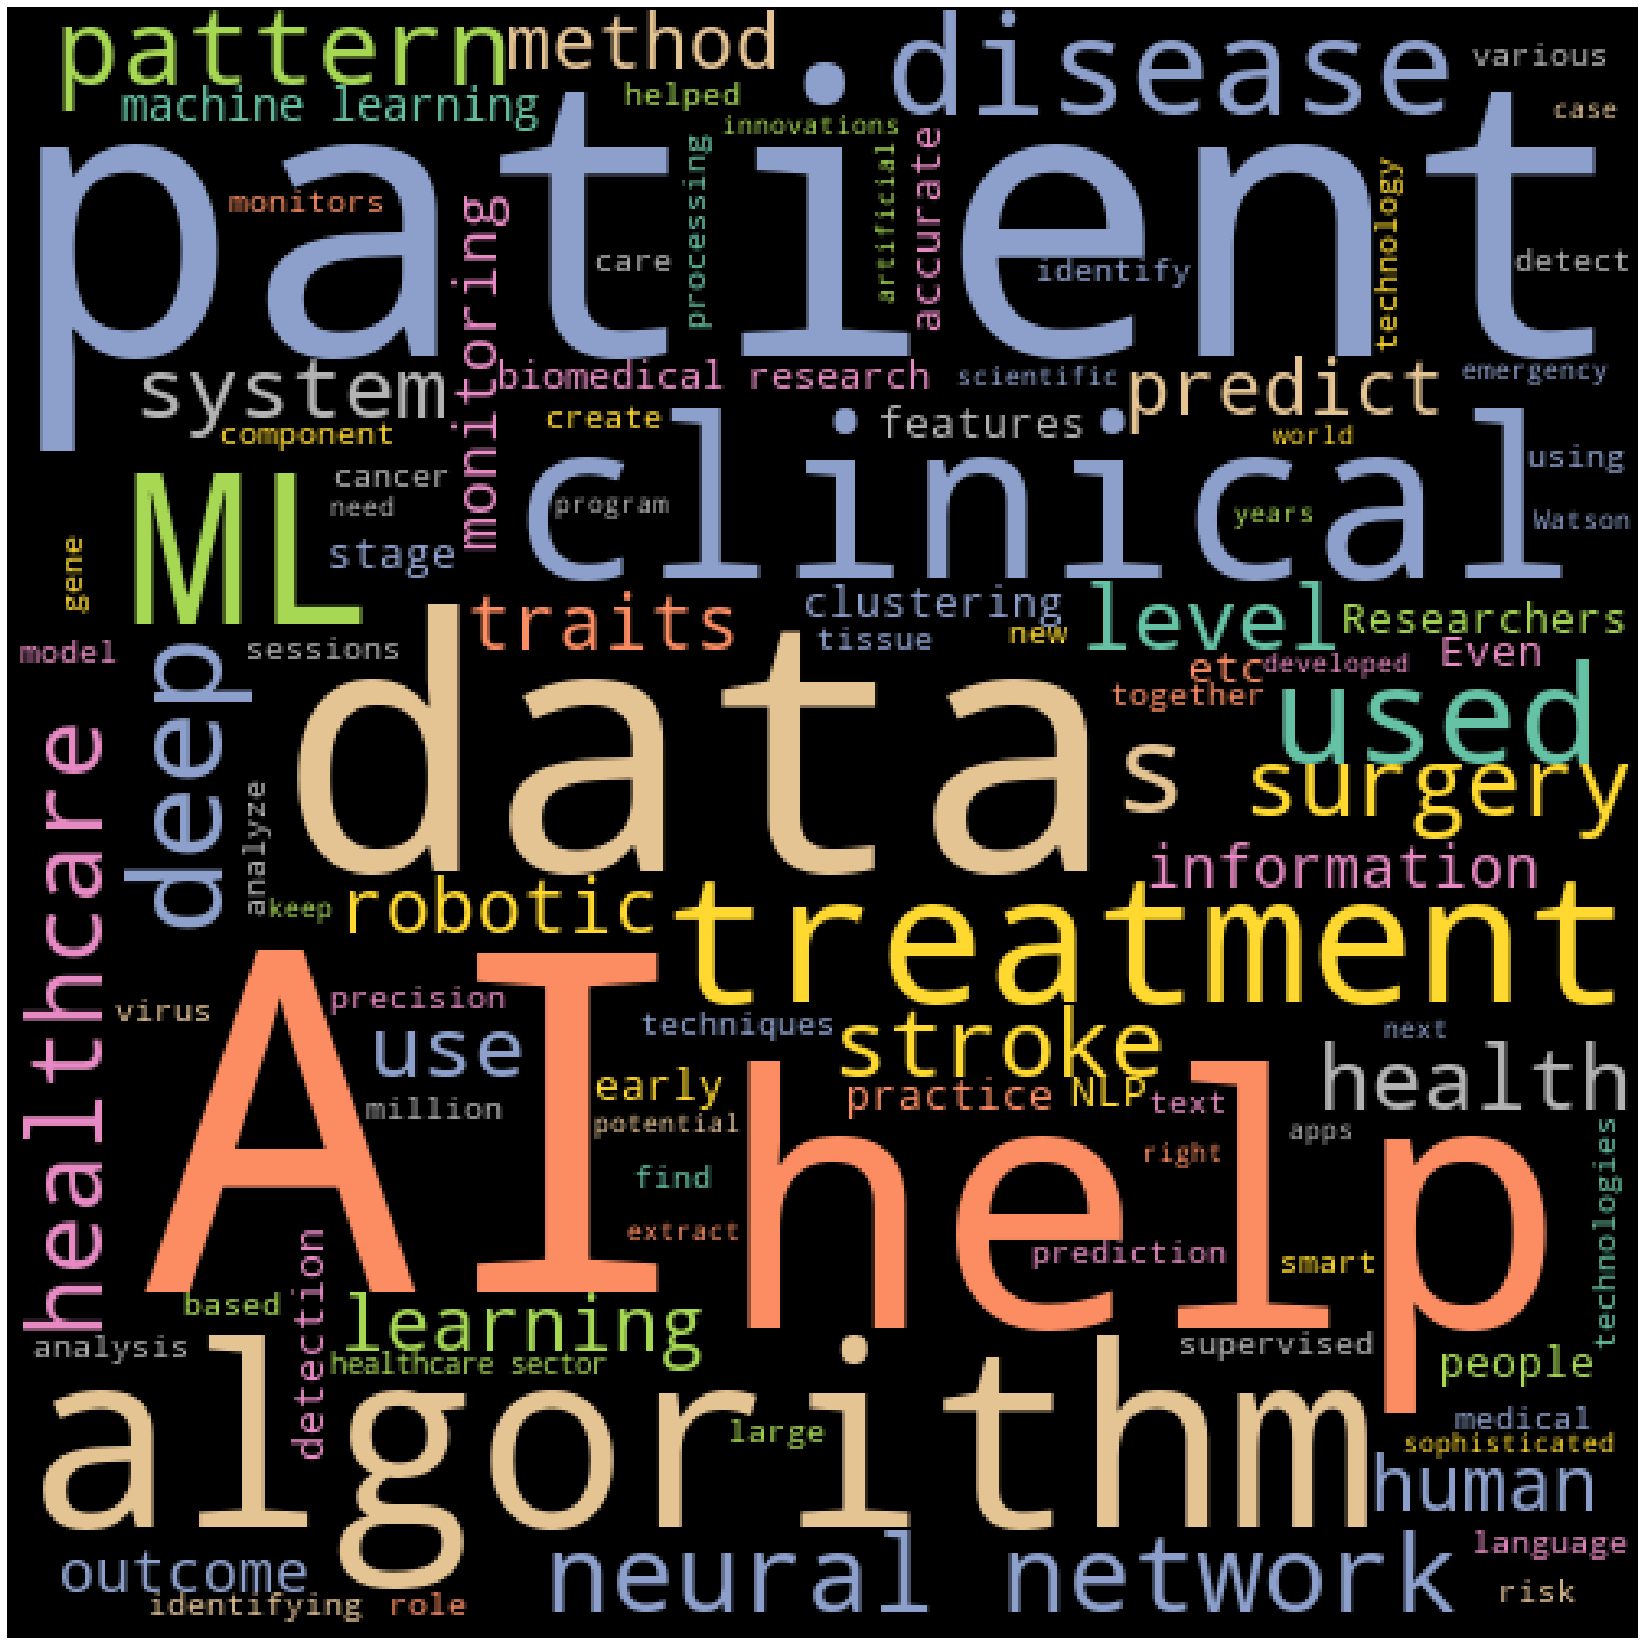

In [51]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 500, height = 500, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(content)
plot_cloud(wordcloud)

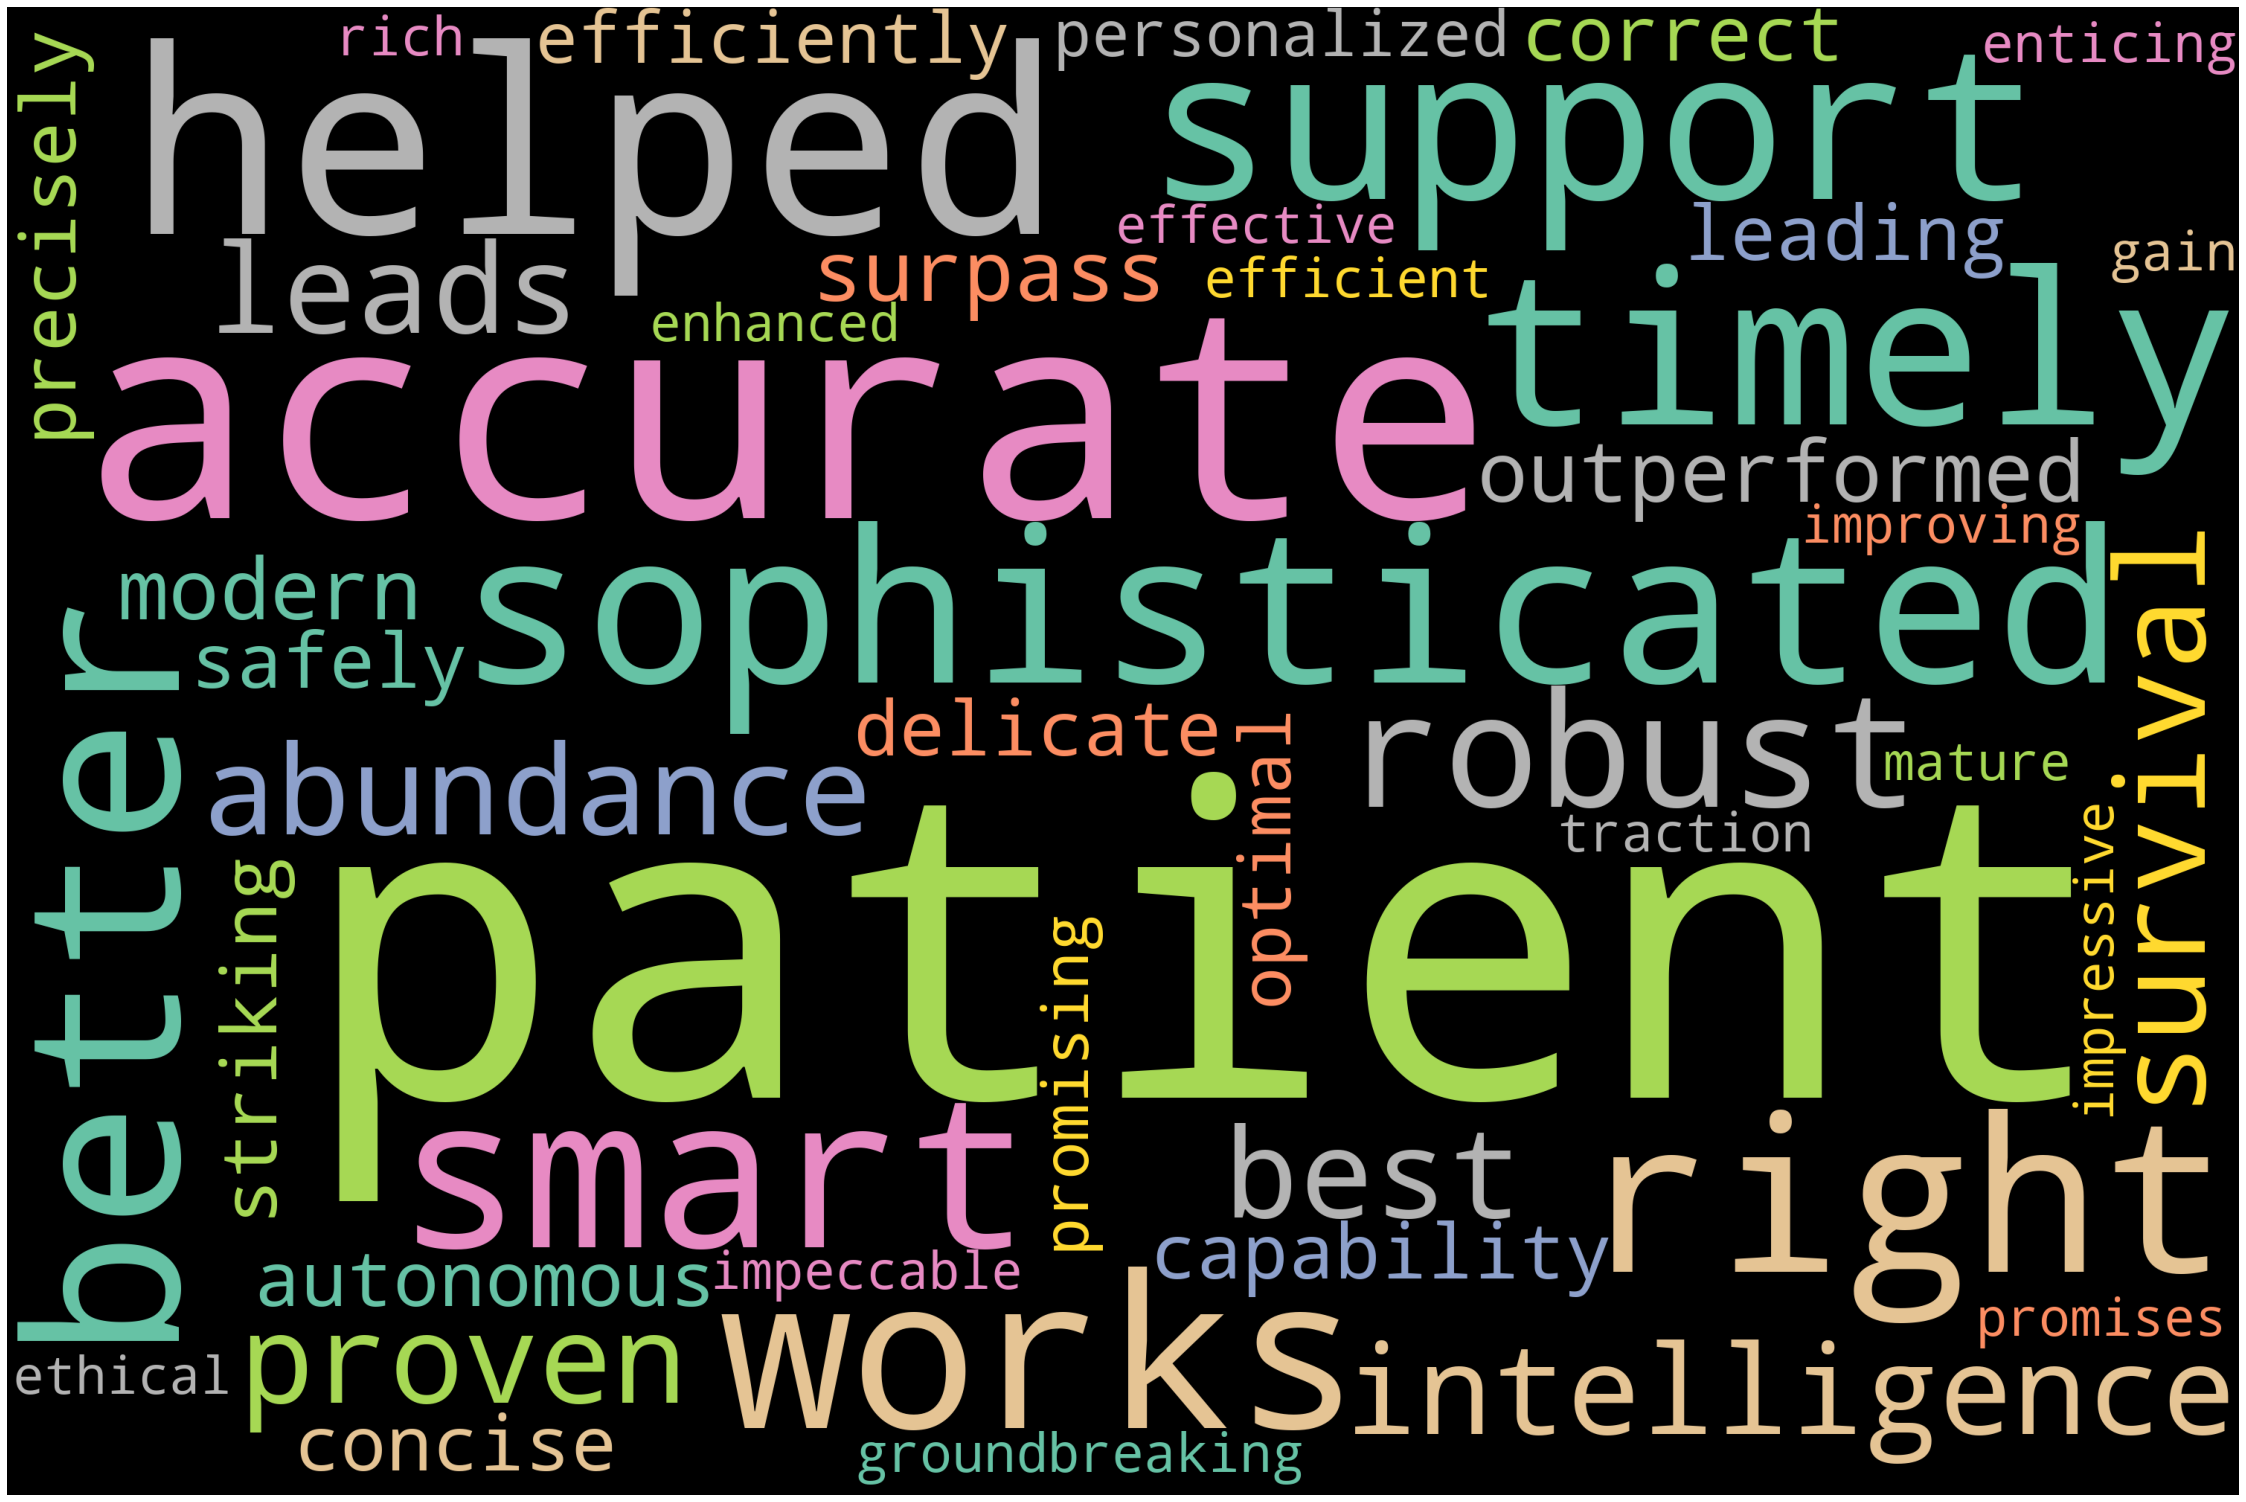

In [52]:
pos_review = " ".join ([w for w in pos_count if w in poswords])
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(pos_review)
plot_cloud(wordcloud)

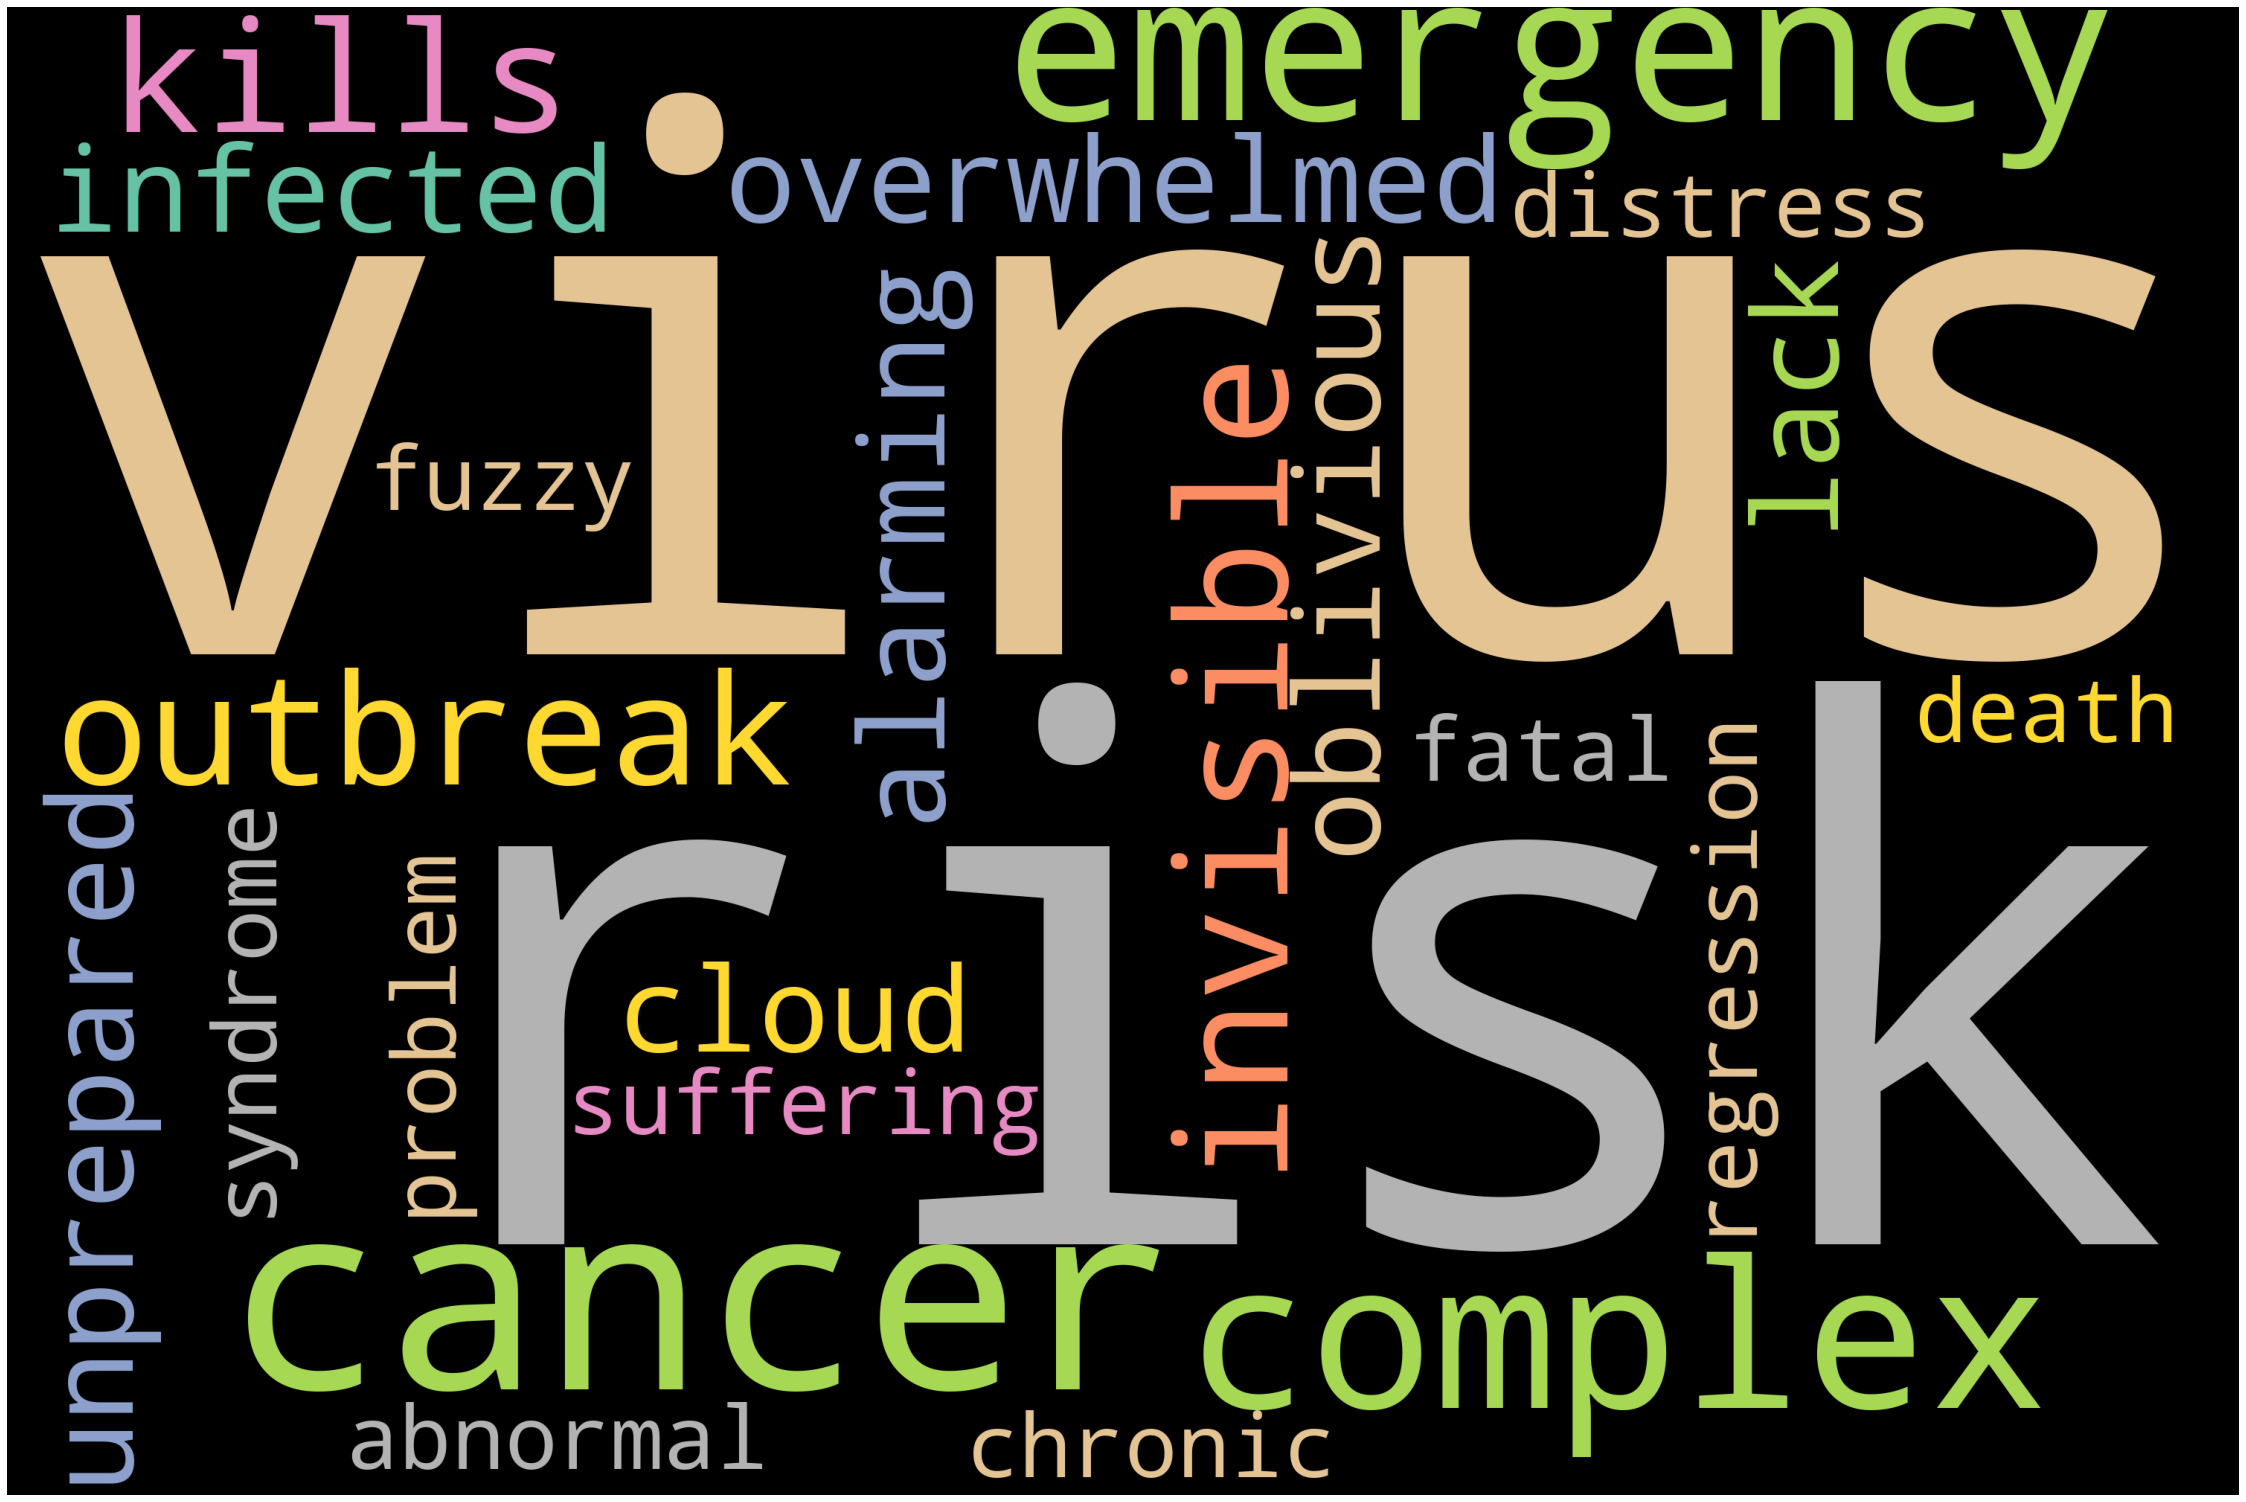

In [53]:
neg_review = " ".join ([w for w in neg_count if w in negwords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(neg_review)
plot_cloud(wordcloud)

In [54]:
data

,url,title,content,filter_content,Positive_Score,Negative_Score,polarity,subjectivity
0,https://insights.blackcoffer.com/ai-in-healthc...,[AI in healthcare to Improve Patient Outcomes ...,Introduction “If anything kills over 10 milli...,Introduction “ If anything kills 10 million pe...,77,33,0.136936,0.463364
